# Logistic Regression and Neural Nets
## Foundations of Machine Learning
## `! git clone https://www.github.com/DS3001/aNN`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
import seaborn as sns

## Logistic Regression and Neural Networks
- We've covered classical algorithms (kNN, kMC, linear models, decision trees) and more modern tools (ensembles, random forests, LASSO)
- The next big jump is to neural networks
- To prepare for that, we'll look at logistic regression today, and build your first neural net

## Logistic Regression
- One of our complaints about linear models for predicting a binary class or a probability is that it might take values less than zero or greater than 1
- There are a variety of ways to fix this, but the most popular are **probit** and **logit**
- The basic premise of these models is that there is an unobserved linear index or **latent variable**,
$$ L_i = b \cdot x_i + \varepsilon_i,$$
but what is observed is
$$ y_i = \begin{cases} 1, & L_i \ge 0 \\ 0, & L_i < 0 \end{cases} $$
- So if the latent index is large or the shock is particularly large, you'll observe a 1; otherwise you observe a zero

## Examples
- What is the probability a test pilot loses consciousness ($y_i =1, 0$) in a high risk scenario, based on physiological data $x_i$? (original application)
- Who buys a new car or washing machine this year ($y_i =1, 0$), based on socio-economic characteristics $x_i$?
- Does a county elect a Democrat or Republican representative?
- Are you hired for a job or denied a loan ($y_i = 0, 1$), based on your qualifications $x_i$?

## Logistic Regression
- To fit these models, we first pick a distribution function for $\varepsilon_i$, $F(x) =pr[\varepsilon_i \le x]$:
    - If we pick $F(x) = \dfrac{1}{1+\exp(-x)}$, we get **Logistic Regression**
    - Notice that as $x \rightarrow \infty$, $F(x) \rightarrow 1$, and as $x \rightarrow -\infty$, $F(x) \rightarrow 0$, and $F(x)$ is increasing in $x$, so this is a value distribution function
    - If we pick the normal distribution, the probability of observing a 1 given $x_i$ is $\Phi(\varepsilon_i)$, where $\Phi$ is the standard normal distribution function, $$ \Phi(\varepsilon_i) = \int_{-\infty}^{\varepsilon_i} \dfrac{1}{\sqrt{2 \pi}} e^{-z^2/2} dz$$ and we get **Probit Regression**
- Today, there is little reason to pick one or the other, but 30-40 years ago, the logistic distribution had an advantage because it was easier to compute than the standard normal distribution, which involves integration

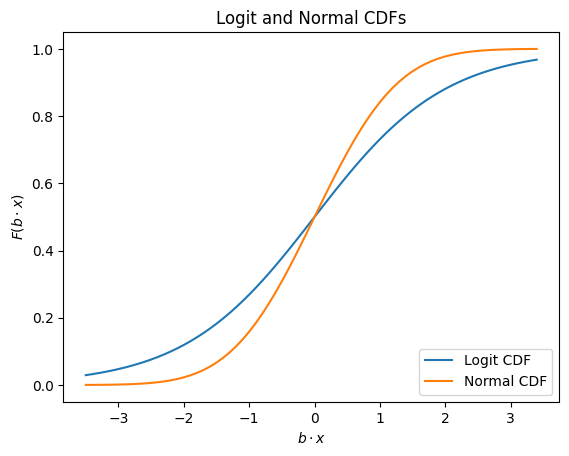

In [2]:
X = np.arange(-3.5,3.5,.1) # Create grid for plot

def F(L): # Logit distribution function
    p = 1/(1+np.exp(-L))
    return p

pr_logit = F(X) # Evaluate logit CDF on grid
pr_normal = norm.cdf(X) # Evaluate normal CDF on grid

# Plot:
plt.plot(X,pr_logit, label ='Logit CDF')
plt.plot(X, pr_normal, label='Normal CDF')
plt.xlabel("$b \\cdot x$")
plt.ylabel("$F(b\\cdot x)$")
plt.legend(loc='lower right')
plt.title('Logit and Normal CDFs')
plt.show()

## Logistic Regression
- What is the probability of observing a 0, given $x_i$? We want to make the following probability "look like" a distribution function so can swap in $F(x)=pr[\varepsilon_i \le x]$:
$$\begin{alignat*}{2}
pr[y=0|x] &=& pr[ b \cdot x_i + \varepsilon_i \le 0 ] \\
&=& pr[  \varepsilon_i \le - b \cdot x_i ] \\
&=& F( - b \cdot x_i) \\
&=& \dfrac{1}{1+\exp(b \cdot x_i)}
\end{alignat*}$$
Since $pr[y=0|x] = 1 - pr[y=1|x]$, using our probability rules, that implies that
$$\begin{alignat*}{2}
pr[y=1|x] &=& 1 - \dfrac{1}{1+\exp(b \cdot x_i)} \\
&=& \dfrac{\exp(b \cdot x_i)}{1+\exp(b \cdot x_i)}\\
&=& \dfrac{1}{1+\exp(-b \cdot x_i)}
\end{alignat*}$$
As you vary $b$, it shapes the probability of observing $y=1$ or $y=0$, 

## Example: Price Discrimination
- The data: You observe data $x_i$ about a consumer and whether they purchased ($y_i=1$) or not ($y_i = 0$) at a price of $p_i$
- You want to build a model that describes how future consumers will respond to different prices.
- The consumer buys if their value, $v_i$, exceeds the price, $p_i$, or $v_i - p_i \ge 0$ 
- Model their net gain as $n_i = b \cdot x_i + \varepsilon_i - p_i$ and substitute into the logit model: $$ \begin{alignat*}{2} pr[\text{buy}|p_i, x_i] &=& pr[n_i \ge 0 ] \\
&=& pr[\varepsilon_i \ge -(b \cdot x_i - p_i) ] \\
&=& 1 - pr[\varepsilon_i < -(b \cdot x_i - p_i) ] \\
&=& 1 - F(-(b \cdot x_i - p_i)) \\
&=& 1 - \dfrac{1}{1+\exp(b \cdot x_i - p_i)} \\
&=&  \dfrac{1}{1+\exp(b \cdot x_i - p_i)} \end{alignat*}$$
- So you can map consumer characteristics into a probability of purchase. This is a workhorse model for price-setting.

## How to Fit A Logistic Regression Model
- You could compute the SSE of the predicted probabilities from the observed outcomes: This is called the **Brier Score**
- Typically, we instead pick $b$ to maximize the probability of observing the data
- $1-F(-b \cdot x_i)$ is the probability of observing a 1, so the probability of observing a zero is $F(-b \cdot x_i)$
- Then the probability of observing these data given $b$ is given by the **likelihood function**,
$$ pr[y|x,b] = \prod_{i: y_i =1} \dfrac{1}{1+\exp(-b \cdot x_i)} \times  \prod_{i: y_i = 0}  \dfrac{1}{1+\exp(b \cdot x_i)}=L(b)$$
We pick $b$ to maximize the log of this quantity using calculus (gradient descent, Newton's method), which is not as bad as it might appear.
- This is called **maximum likelihood estimation**, and is an alternative way to approach the problem of picking parameters $b$ to fit a model to data that has excellent statistical properties
- You can Lasso a logit model with `glmnet`

## Logistic regression
- Scikit, of course, has a package for this:
    - `from sklearn.linear_model import LogisticRegression`
- Logistic regression is a regression object, just like `LinearRegression`


In [3]:
## Example
pd.set_option('display.max_columns', None)
df = pd.read_csv('./data/brazil_default.csv', encoding = 'latin1', low_memory = False)
df.head()

,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,STATE_OF_BIRTH,CITY_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCIAL_PHONE_AREA_CODE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_MOBILE_PHONE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,PROFESSIONAL_STATE,PROFESSIONAL_CITY,PROFESSIONAL_BOROUGH,FLAG_PROFESSIONAL_PHONE,PROFESSIONAL_PHONE_AREA_CODE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,MATE_PROFESSION_CODE,EDUCATION_LEVEL.1,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
0,1,C,5,Web,0,1,F,6,1,0,RN,Assu,1,RN,Santana do Matos,Centro,Y,105,1.0,15.0,N,1,900.0,0.0,1,1,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,4.0,NaN,NaN,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,RJ,rio de janeiro,1,RJ,RIO DE JANEIRO,CAMPO GRANDE,Y,20,1.0,1.0,N,1,750.0,0.0,0,0,0,0,0,0,0,0.0,0,Y,,NaN,NaN,N,,0,11.0,4.0,11.0,NaN,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,RN,GARANHUNS,1,RN,Parnamirim,Boa Esperanca,Y,105,1.0,NaN,N,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,11.0,NaN,NaN,NaN,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,PE,CABO,1,PE,CABO,PONTE DOS CARVALHOS,N,,NaN,NaN,N,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,NaN,NaN,NaN,NaN,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,RJ,RIO DE JANEIRO,1,RJ,Rio de Janeiro,Santa Cruz,Y,20,1.0,12.0,N,1,1200.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,5.0,NaN,NaN,0,0,0,0,1,N,48,235,235,1


In [4]:
df.describe()

,ID_CLIENT,PAYMENT_DAY,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,NACIONALITY,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,MATE_PROFESSION_CODE,EDUCATION_LEVEL.1,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,AGE,TARGET_LABEL_BAD=1
count,50000.000000,50000.000000,50000.0,50000.000000,50000.00000,50000.000000,50000.0,50000.000000,48651.000000,46223.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,42244.000000,42687.000000,21116.000000,17662.000000,50000.0,50000.0,50000.0,50000.0,50000.000000,50000.00000,50000.000000
mean,25000.500000,12.869920,0.0,1.006540,2.14840,0.650520,0.0,0.961600,1.252225,9.727149,0.802280,886.678437,35.434760,0.111440,0.097460,0.001320,0.001740,0.002040,0.357840,0.357840,2.322372e+03,0.336140,0.009320,8.061784,2.484316,3.797926,0.296003,0.0,0.0,0.0,0.0,1.275700,43.24852,0.260820
std,14433.901067,6.608385,0.0,0.080606,1.32285,1.193655,0.0,0.202105,0.867833,10.668841,0.398284,7846.959327,891.515142,0.314679,0.296586,0.036308,0.041677,0.045121,0.479953,0.479953,4.235798e+04,0.472392,0.383453,3.220104,1.532261,5.212168,0.955688,0.0,0.0,0.0,0.0,0.988286,14.98905,0.439086
min,1.000000,1.000000,0.0,1.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,6.00000,0.000000
25%,12500.750000,10.000000,0.0,1.000000,1.00000,0.000000,0.0,1.000000,1.000000,1.000000,1.000000,360.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,31.00000,0.000000
50%,25000.500000,10.000000,0.0,1.000000,2.00000,0.000000,0.0,1.000000,1.000000,6.000000,1.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,9.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,41.00000,0.000000
75%,37500.250000,15.000000,0.0,1.000000,2.00000,1.000000,0.0,1.000000,1.000000,15.000000,1.000000,800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,9.000000,4.000000,11.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,53.00000,1.000000
max,50000.000000,25.000000,0.0,2.000000,7.00000,53.000000,0.0,2.000000,5.000000,228.000000,1.000000,959000.000000,194344.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,6.000000e+06,1.000000,35.000000,18.000000,5.000000,17.000000,5.000000,0.0,0.0,0.0,0.0,7.000000,106.00000,1.000000


In [5]:
df = pd.read_csv('./data/brazil_default.csv', encoding = 'latin1', low_memory = False)

df['Intercept'] = np.ones(df.shape[0])

num_var = ['Intercept','PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES','FLAG_EMAIL', 
          'FLAG_DINERS', 'FLAG_AMERICAN_EXPRESS', 'FLAG_MASTERCARD', 'FLAG_OTHER_CARDS', 
          'PERSONAL_ASSETS_VALUE']
cat_var = ['MARITAL_STATUS', 'QUANT_DEPENDANTS','QUANT_BANKING_ACCOUNTS', 'QUANT_CARS', 
           'EDUCATION_LEVEL.1','PROFESSION_CODE']

df = df.loc[:, ['TARGET_LABEL_BAD=1']+num_var+cat_var ]

In [6]:
df.isnull().describe()

,TARGET_LABEL_BAD=1,Intercept,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_EMAIL,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_MASTERCARD,FLAG_OTHER_CARDS,PERSONAL_ASSETS_VALUE,MARITAL_STATUS,QUANT_DEPENDANTS,QUANT_BANKING_ACCOUNTS,QUANT_CARS,EDUCATION_LEVEL.1,PROFESSION_CODE
count,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
freq,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,32338,42244


In [7]:
print(df['PROFESSION_CODE'].value_counts())
df['PROFESSION_CODE'] = df['PROFESSION_CODE'].replace(np.nan,'Missing')
print(df['PROFESSION_CODE'].value_counts())

print(df['EDUCATION_LEVEL.1'].value_counts())
df['EDUCATION_LEVEL.1'] = df['EDUCATION_LEVEL.1'].replace(np.nan,'Missing')
print(df['EDUCATION_LEVEL.1'].value_counts())

PROFESSION_CODE
9.0     30092
11.0     3545
0.0      3540
2.0      2827
12.0      489
10.0      425
16.0      344
13.0      313
7.0       216
8.0       144
6.0       136
15.0       63
17.0       35
4.0        27
3.0        18
5.0        12
14.0        9
1.0         8
18.0        1
Name: count, dtype: int64
PROFESSION_CODE
9.0        30092
Missing     7756
11.0        3545
0.0         3540
2.0         2827
12.0         489
10.0         425
16.0         344
13.0         313
7.0          216
8.0          144
6.0          136
15.0          63
17.0          35
4.0           27
3.0           18
5.0           12
14.0           9
1.0            8
18.0           1
Name: count, dtype: int64
EDUCATION_LEVEL.1
0.0    15995
3.0      621
4.0      615
2.0      342
1.0       56
5.0       33
Name: count, dtype: int64
EDUCATION_LEVEL.1
Missing    32338
0.0        15995
3.0          621
4.0          615
2.0          342
1.0           56
5.0           33
Name: count, dtype: int64


In [8]:
print(np.sum( df.isnull() ))

TARGET_LABEL_BAD=1         0
Intercept                  0
PERSONAL_MONTHLY_INCOME    0
OTHER_INCOMES              0
FLAG_EMAIL                 0
FLAG_DINERS                0
FLAG_AMERICAN_EXPRESS      0
FLAG_MASTERCARD            0
FLAG_OTHER_CARDS           0
PERSONAL_ASSETS_VALUE      0
MARITAL_STATUS             0
QUANT_DEPENDANTS           0
QUANT_BANKING_ACCOUNTS     0
QUANT_CARS                 0
EDUCATION_LEVEL.1          0
PROFESSION_CODE            0
dtype: int64


/home/trj2j/miniconda3/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Accuracy:  0.73926


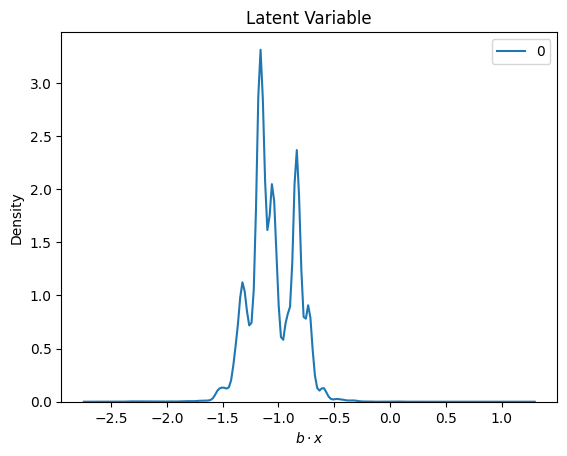

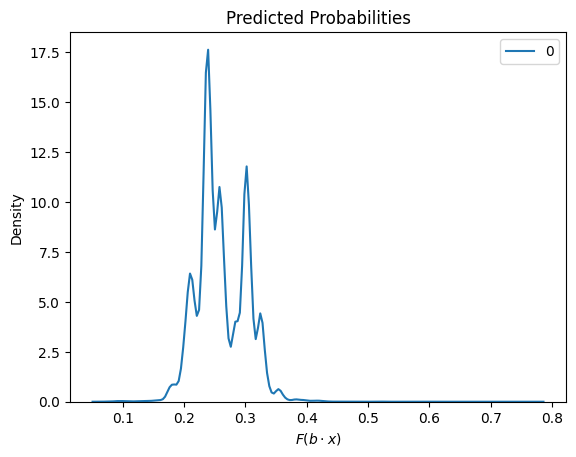

In [9]:
from sklearn.linear_model import LogisticRegression

# Outcome variable:
y = df['TARGET_LABEL_BAD=1']

# Create dummies:
X_n = df.loc[:,num_var]
dummies = pd.DataFrame([]) # In general, use lists and append instead of DataFrame and pd.concat
for var in cat_var: 
    new_dummies = pd.get_dummies( df.loc[:,var], drop_first=True, dtype=int)
    dummies = pd.concat([dummies, new_dummies], axis=1, ignore_index=True) 
    
X = pd.concat([X_n,dummies],axis=1) 
X.columns = X.columns.astype(str)

# Fit logistic regression:
reg = LogisticRegression(fit_intercept=False, solver = 'newton-cholesky', max_iter=1000).fit(X,y)
print('Accuracy: ', reg.score(X,y))

# Latent variable:
latent = np.matmul( X, reg.coef_.T  ) + reg.intercept_
sns.kdeplot(latent).set_title('Latent Variable')
plt.xlabel("$b \\cdot x$")
plt.show()

# Probability of default:
pr_hat = 1/(1+np.exp(-latent))
sns.kdeplot(pr_hat).set_title('Predicted Probabilities')
plt.xlabel("$F(b \\cdot x$)")

plt.show()


## Multinomial Logit
- If you have more than two discrete outcomes, you can still use the Logit model, unlike the Linear Probability Model
- For each outcome $k=1,...,K$, you have a latent variable $L^k_i = \beta_k \cdot x_i + \varepsilon_{ik}$
- Imagine deciding which make/model of a car to buy, or which ready-to-eat cereal to purchase: $L^k_i$ is how much you like option $k$
- The outcome is the maximum value over all the latent indices $(L^1_i, L^2_i, ..., L^K_i)$: $y_i = \text{argmax}_k L_{ik}$
- Imagine deciding which make/model of a car to buy, or which ready-to-eat cereal to purchase: $y_i$ is the choice you actually make in terms of brand
- You can show that
$$ pr[y_i = k] = \dfrac{e^{\beta_k \cdot x_i}}{1+\sum_{j=1}^K e^{\beta_j \cdot x_i}}$$
and fit the model using maximum likelihood,
$$L(\beta_1, \beta_2, ..., \beta_K) = \prod_{i: y_i = 1} \dfrac{e^{\beta_1 \cdot x_i}}{1+\sum_{j=1}^K e^{\beta_j \cdot x_i}} \prod_{i:y_i = 2} \dfrac{e^{\beta_2 \cdot x_i}}{1+\sum_{j=1}^K e^{\beta_j \cdot x_i}} \cdot \cdot \cdot \prod_{i: y_i = K} \dfrac{e^{\beta_K \cdot x_i}}{ 1+\sum_{j=1}^K e^{\beta_j \cdot x_i}}
$$
- This is popular in marketing and the kind of model you should be "afraid" of, in the sense that we can use information about people $x_i$ to pick parameters $b$ and pick profit-maximizing prices

## Example: Landmines
- There are five kinds of landmines, which must be disarmed in different ways
- There are three predictor/feature/covariates available: voltage, height, and soil
- We want to build a model to predictive model to aid people in decision-making when facing these devices

In [10]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

mdf = pd.read_csv('./data/land_mines.csv') # landmine data

## Data for sklearn
y = mdf['mine_type']
X = mdf.drop('mine_type',axis=1)

## Run Logistic Regression
mnl = LogisticRegression(penalty=None).fit(X,y)

## Regression coefficients
mnl_coef = pd.DataFrame(mnl.coef_)
mnl_coef = mnl_coef.set_axis(mnl.feature_names_in_,axis=1)
print('Coefficients for each landmine type:')
mnl_coef


Coefficients for each landmine type:


,voltage,height,soil
0,-27.160473,-4.217283,1.008841
1,37.249504,9.236162,-2.769627
2,3.838235,-0.407835,0.267611
3,-11.667221,-3.071488,0.833919
4,-2.260045,-1.539557,0.659257


In [11]:
pd.DataFrame(mnl.predict_proba(X)) # For each landmine, what's the probability of each type?

,0,1,2,3,4
0,0.452967,0.000009,0.066211,0.346619,0.134195
1,0.456547,0.000031,0.076554,0.325986,0.140882
2,0.577952,0.000016,0.048908,0.273674,0.099450
3,0.641892,0.000028,0.041890,0.232563,0.083627
4,0.570119,0.000129,0.064459,0.253743,0.111550
...,...,...,...,...,...
333,0.139971,0.045524,0.305945,0.224695,0.283866
334,0.073745,0.000336,0.274076,0.301256,0.350587
335,0.247693,0.000129,0.156706,0.339611,0.255861
336,0.121238,0.004442,0.287099,0.261459,0.325763


## Multinomial Logit
- You can motivate multinomial logit the same way we motivated logistic regression: There's a latent index $L_{ik} = x_i \cdot \beta_k + \varepsilon_{ik}$, and the maximum of those latent values is observed
- Classification looked like it would be hard or impossible to do with a linear index function: So use a bunch of index functions, one for each option
- Of course, you can use multinomial logit for any classification situation in which you want a more explainable approach than, say, $k$-NN

## How are Logistic Regression and Neural Nets related?
- What is a brain?
- Stimulus occurs: You experience a sight/sound/smell/taste/touch
- The stimulus causes a signal that reaches your brain
- Neurons fire in response and you experience memories/thoughts/etc., or you don't even notice the signal was received
- This process is noisy: Sometimes a smell catchs your attention, sometimes it doesn't
- The premise of an **artificial neural network** is to use this architecture of signal/response to build a machine intelligence
- Artificial neural networks mimic the structure of the brain to mimic the function of human intelligence
- The entry-level model of a neuron is the Logistic Regression model

## The Simplest Neural Network
- In the logistic regression, call $x$ the **input layer** and $y$ the **output**
- All aNN's have input layers and output: the data $x$ and the firing of the neuron $y$
- This is a **single layer** neural network; additional **hidden layers** are added between input and output to model the **architecture** of the network --- the shocks in early/low levels of the network are fed forward to influence whether neurons fire in later/higher levels of the network

![](singleLayer.png)

## Logistic Regression as Neural Net
- Imagine you have one neuron.
- You can... notice? Become aware?
- But allegedly your brain is just a bunch of neurons wired together to produce consciousness
- How do we build up your brain from logit regressions?
- We wire logits together in layers

![](multipleLayer.png)

## Adding Hidden Layers
- To make a network with a hidden layer, we have
    - The input layer, $x$
    - A single hidden layer, $z_k = F(b_k^1 x)$ for $k = 1, ..., K$, which is just $K$ logistic regressions
    - A single output layer, $y = b^o \cdot z = \sum_{k=1}^K b^0_k z_k$, which is just a linear model
- So there's (1) a stimulus $x$, (2) $K$ neurons fire or don't depending on the stimulus, and then (3) the output evaluates as a weighted sum of the neurons that did fire
- You can see, you're going to start accumulating a lot of coefficients to fit (the $K$ vectors of $b^1_k$ coefficients of length $N$, the $b^o$ coefficients) --- regularization is a useful tool here

## How Many Layers?
- How many hidden layers? It depends
- For the kinds of straightforward prediction problems we've looked at in class, probably not more than two; there are analyses and rules-of-thumb that people have developed that suggest two is fine for prediction-type tasks 
- A popular aNN in computer vision (convolutional neural networks) has three layers, as a matter of mathematical necessity (a CNN must have 3 layers to work)
- More than three layers qualifies as "deep learning," which might surprise you
- The power of generative artificial intelligence and large language models comes from having a very deep neural network: ChatGPT has 96 hidden layers and 1.75 billion parameters, which cost about 100k to fit (and about 700k per day to run)

## Other Architecture Questions
- For prediction, aNN are typically **densely connected**: Every node in every layer is connected to every node in the next later
- In general similar to the number of layers, it depends
- These questions increasingly become ones of engineering and experience, but there is a useful result to know, called the Kolmogorov-Arnold Representation Theorem:
    - If $f$ is a continuous function taking a variable $x = (x_1, x_2, ..., x_K)$ into a real number $y$, then $f$ can be written in the form
$
f(x) = \sum_{i=0}^{2K} g \left( \sum_{j=1}^{K} h_{ij}(x_i,x_j) \right).
$
- So multi-valued, continuous, real functions naturally have a "layered" representation that looks like an aNN; this is another way to motivate studying them

## Packages for aNN Analysis
- There are a variety of packages for neural network analysis:
    - PyTorch
    - Keras/TensorFlow
    - SciKit
- The aNN support is probably the main reason to use Python, not scikit

## Keras
- Keras is a high-level API for TensorFlow
- The philosophy of fitting a neural network is more about "designing the architecture" than about "picking a model"
- Ideally, the neural network will "learn" the hidden structure that we've been capturing through the choice of model
- There are roughly three steps to training the network:
    1. Design the aNN architecture (number of hidden layers, the number of nodes per layer, etc.)
    2. Provide directions for how to fit it (the loss function, what optimizer to use, what metrics of success to report)
    3. Fit the network (actually run the code to pick the weights)
- Let's do an example with the lending data

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

labels = np.ravel(y) # Convert y from a Pandas series to Numpy array
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=100) # Train-test split

## 1. Design neural network architecture:
net = Sequential() # Initialize network
net.add(Dense(units=5,activation='sigmoid')) # Hidden layer 1
net.add(Dense(units=5,activation='sigmoid')) # Hidden layer 2
net.add(Dense(units=1,activation='sigmoid')) # Output layer

## 2. Provide directions for network compilation:
net.compile( loss = 'binary_crossentropy', # Specify loss function
                optimizer = 'sgd', # Stochastic Gradient Descent
                metrics = ['accuracy'] # Other success metrics, like Rsq or accuracy
        )

## 3. Fit the network:
net.fit(X_train, y_train, 
        epochs=2,
        verbose=1,
        batch_size=1)

2024-11-17 01:53:47.395419: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-17 01:53:47.396433: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-17 01:53:47.401209: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-17 01:53:47.412132: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731826427.425382   53278 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731826427.42

Epoch 1/2


2024-11-17 01:53:48.653159: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1909 - loss: -7.7065
Epoch 2/2
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2343 - loss: -52.1488


In [13]:
net.summary() # Output summary

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (1, 5)                 │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (1, 5)                 │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (1, 1)                 │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58 (236.00 B)

 Trainable params: 56 (224.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [14]:
score = net.evaluate(X_test, y_test,verbose=1)
print(score)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1893 - loss: -99.9769   
[-99.2348403930664, 0.19117647409439087]


## Common misconceptions
- More nodes and layers does not mean better results (We got an accuracy of .7449 with the neural net with 341 parameters... and .7394 with the vanilla logistic regression with 61 parameters)
- The number of nodes in each hidden layers shouldn't necessarily decrease from input to output: Some architectures shrink down and then expand (e.g. variational auto encoder)
- Neural networks aren't guaranteed to do better than, say, a random forest or the LASSO --- in a lot of situations they have be very hard to fit

## Big picture choices
- What loss function? Are you doing classification or regression?
- What activation function? The logistic/sigmoid is popular, but there are many options
- How many layers? How many nodes per layer? (Architecture, structure)
- What optimizer? Stochastic Gradient Descent is popular, but there are many options
- Some of these choices can be determined by cross validation (e.g. the number of hidden layers and nodes)

## Common Loss Functions
- Binary cross-entropy/log-loss, `binary_crossentropy`, for 0/1 classification: Letting $\hat{p}_i$ be the predicted probability that observation $y_i$ takes the value 1, 
$$
L_{bxe} = - \dfrac{1}{N} \sum_{i=1}^N y_i \log \left( \hat{p}_i \right) + (1-y_i) \log \left( 1 - \hat{p}_i\right)
$$
- Categorical cross-entropy/log-loss, `categorical_crossentropy`, for multi-label classification: Letting $\hat{p}_{ik}$ be the predicted probability that observation $i$ is in category $k$, 
$$
L_{cxe} = - \dfrac{1}{N} \sum_{i=1}^N \sum_{k=1}^K y_{ik} \log \left( \hat{p}_{ik} \right)
$$
- Mean-squared error, for regression: Letting $\hat{y}_i$ be the predicted value for observation $i$,
$$
L_{mse} = \dfrac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2
$$

## Activation Functions
- The logistic function is a nice place to start because it ties together our linear models discussions with the story about neural networks mimicing human brains, but people often use other models of neurons
- Just to show you what they look like, some options besides $1/(1+\exp(-z))$ include:
    - **Tanh**: $f(x) = \dfrac{e^x-e^{-x}}{e^x+e^{-x}}$
    - **rectified linear unit** or ReLU: $f(x) = \max \{ x, 0 \} $
    - **Leaky ReLU**: $f(x) = \max\{.9x, x\}$
    - **Exponential Linear Unit**: $f(x) = \begin{cases} x, & x>0\\ e^x-1, & x < 0 \end{cases}$
- Ultimately, this is all similar to a linear model: We have to pick all these weights, so we'll be using the derivative/gradient to search for weights that provide the best fit
- Why switch to something else? For every large values of the latent variable, the sigmoid/logistic function flattens out, and this can be inconvenient for training models

## Artificial Neural Networks
- The neural network question is, "Can you push the data further with more parameters and structure?"
- There is nothing magical about aNN: They're just a powerful and flexible structure to use to build models out of weighted compositions of linear models, and ultimately very similar to other tools presented in class (in the words of a lot of stats people, "They're just nested nonlinear regressions!@!!!")
- You can see why aNNs have a reputation for being "black boxes": We don't have nearly as much intuition for how they work as we do, say, linear models
- The folk wisdom is that the aNN "learns the structure" of the relationship between $y$ and $x$ by creating new variables in the hidden layers, so that it automatically does feature engineering for you, unlike in, say, a linear model, where the only features that appear are the ones you build
- But aNN have accomplished a lot, and continue to be a source of innovation in ML
- At this point, you're ready to embark on a lot of modern work related to machine learning, statistics, neural networks, and beyond